# Customer Churn Prediction using Machine Learning & Deep Learning

## Step 1: Load Required Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization


## Step 2: Load Dataset

In [2]:

file_path = "customer_churn_dataset-testing-master.csv"
df = pd.read_csv(file_path)
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


## Step 3: Exploratory Data Analysis (EDA)

### 1. Summary Statistics

In [3]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


### 2. Missing Values Check

In [4]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


### 3. Class Distribution

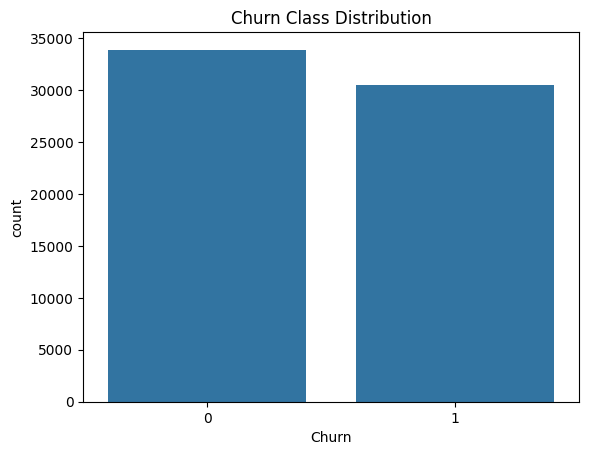

In [5]:

sns.countplot(x=df['Churn'])
plt.title("Churn Class Distribution")
plt.show()


### 4. Correlation Matrix

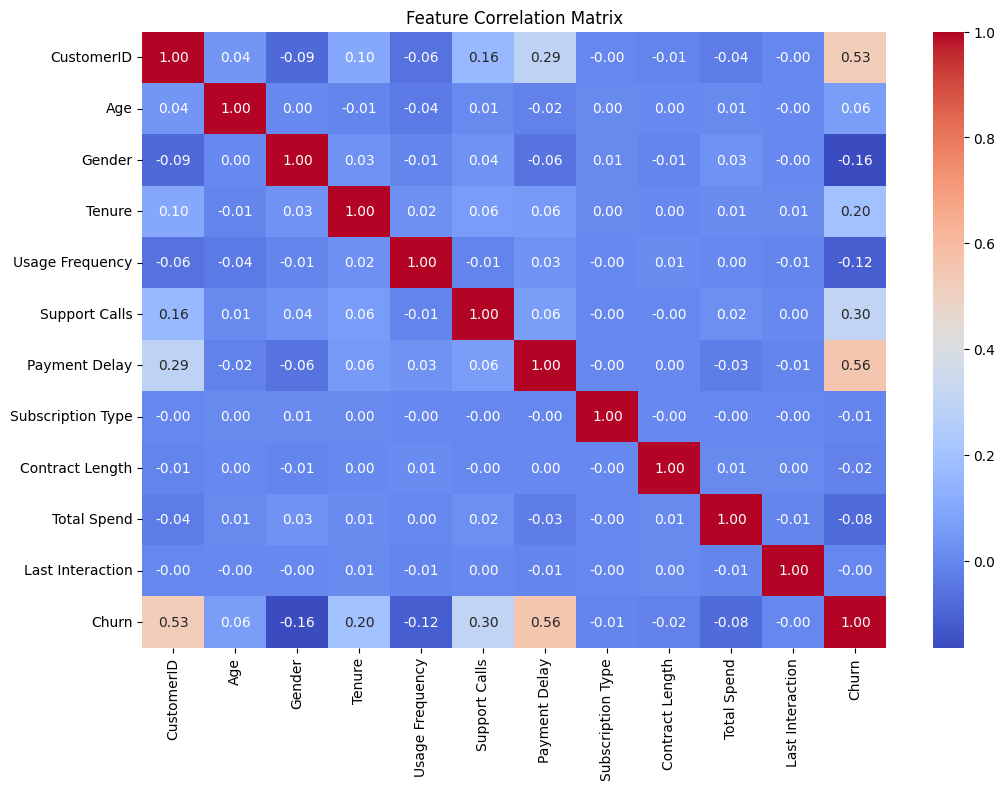

In [6]:
# Convert categorical columns to numeric if not already encoded
df_encoded = df.copy()
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_cols:
    if df_encoded[col].dtype == 'object':  # Check if not already numeric
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


## Step 4: Data Preprocessing

In [7]:

df.drop(columns=['CustomerID'], errors='ignore', inplace=True)

label_encoders = {}
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

scaler = StandardScaler()
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df.drop(columns=['Churn']).values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Step 5: Machine Learning Models

### Random Forest Classifier

In [8]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6776
           1       1.00      1.00      1.00      6099

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



### Gradient Boosting Classifier

In [9]:

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6776
           1       1.00      0.99      0.99      6099

    accuracy                           0.99     12875
   macro avg       0.99      0.99      0.99     12875
weighted avg       0.99      0.99      0.99     12875



### AdaBoost Classifier

In [10]:

ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)
print(classification_report(y_test, y_pred_ab))


              precision    recall  f1-score   support

           0       0.90      0.87      0.89      6776
           1       0.86      0.89      0.88      6099

    accuracy                           0.88     12875
   macro avg       0.88      0.88      0.88     12875
weighted avg       0.88      0.88      0.88     12875



### Support Vector Machine (SVM)

In [12]:
svm = SVC(kernel='rbf', probability=False, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      6776
           1       0.92      0.95      0.94      6099

    accuracy                           0.94     12875
   macro avg       0.94      0.94      0.94     12875
weighted avg       0.94      0.94      0.94     12875



### Voting Classifier

In [14]:

voting_clf = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('ab', ab)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred_voting))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6776
           1       1.00      1.00      1.00      6099

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



## Step 6: Deep Learning - CNN Model

In [15]:

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_cnn, y_train, epochs=20, batch_size=64, validation_data=(X_test_cnn, y_test))

cnn_loss, cnn_accuracy = model.evaluate(X_test_cnn, y_test)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


805/805 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8675 - loss: 0.2892 - val_accuracy: 0.9588 - val_loss: 0.0978
Epoch 2/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9544 - loss: 0.1111 - val_accuracy: 0.9764 - val_loss: 0.0570
Epoch 3/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9701 - loss: 0.0777 - val_accuracy: 0.9774 - val_loss: 0.0588
Epoch 4/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9732 - loss: 0.0679 - val_accuracy: 0.9830 - val_loss: 0.0425
Epoch 5/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9777 - loss: 0.0557 - val_accuracy: 0.9803 - val_loss: 0.0486
Epoch 6/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9802 - loss: 0.0516 - val_accuracy: 0.9887 - val_loss: 0.0343
Epoch 7/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9828 - loss: 0.0455 - val_accuracy: 0.9887 - val_loss: 0.0282
Epoch 8/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9854 - loss: 0.0404 - val_accuracy: 0.9846 -

## Step 7: Model Comparison & Evaluation

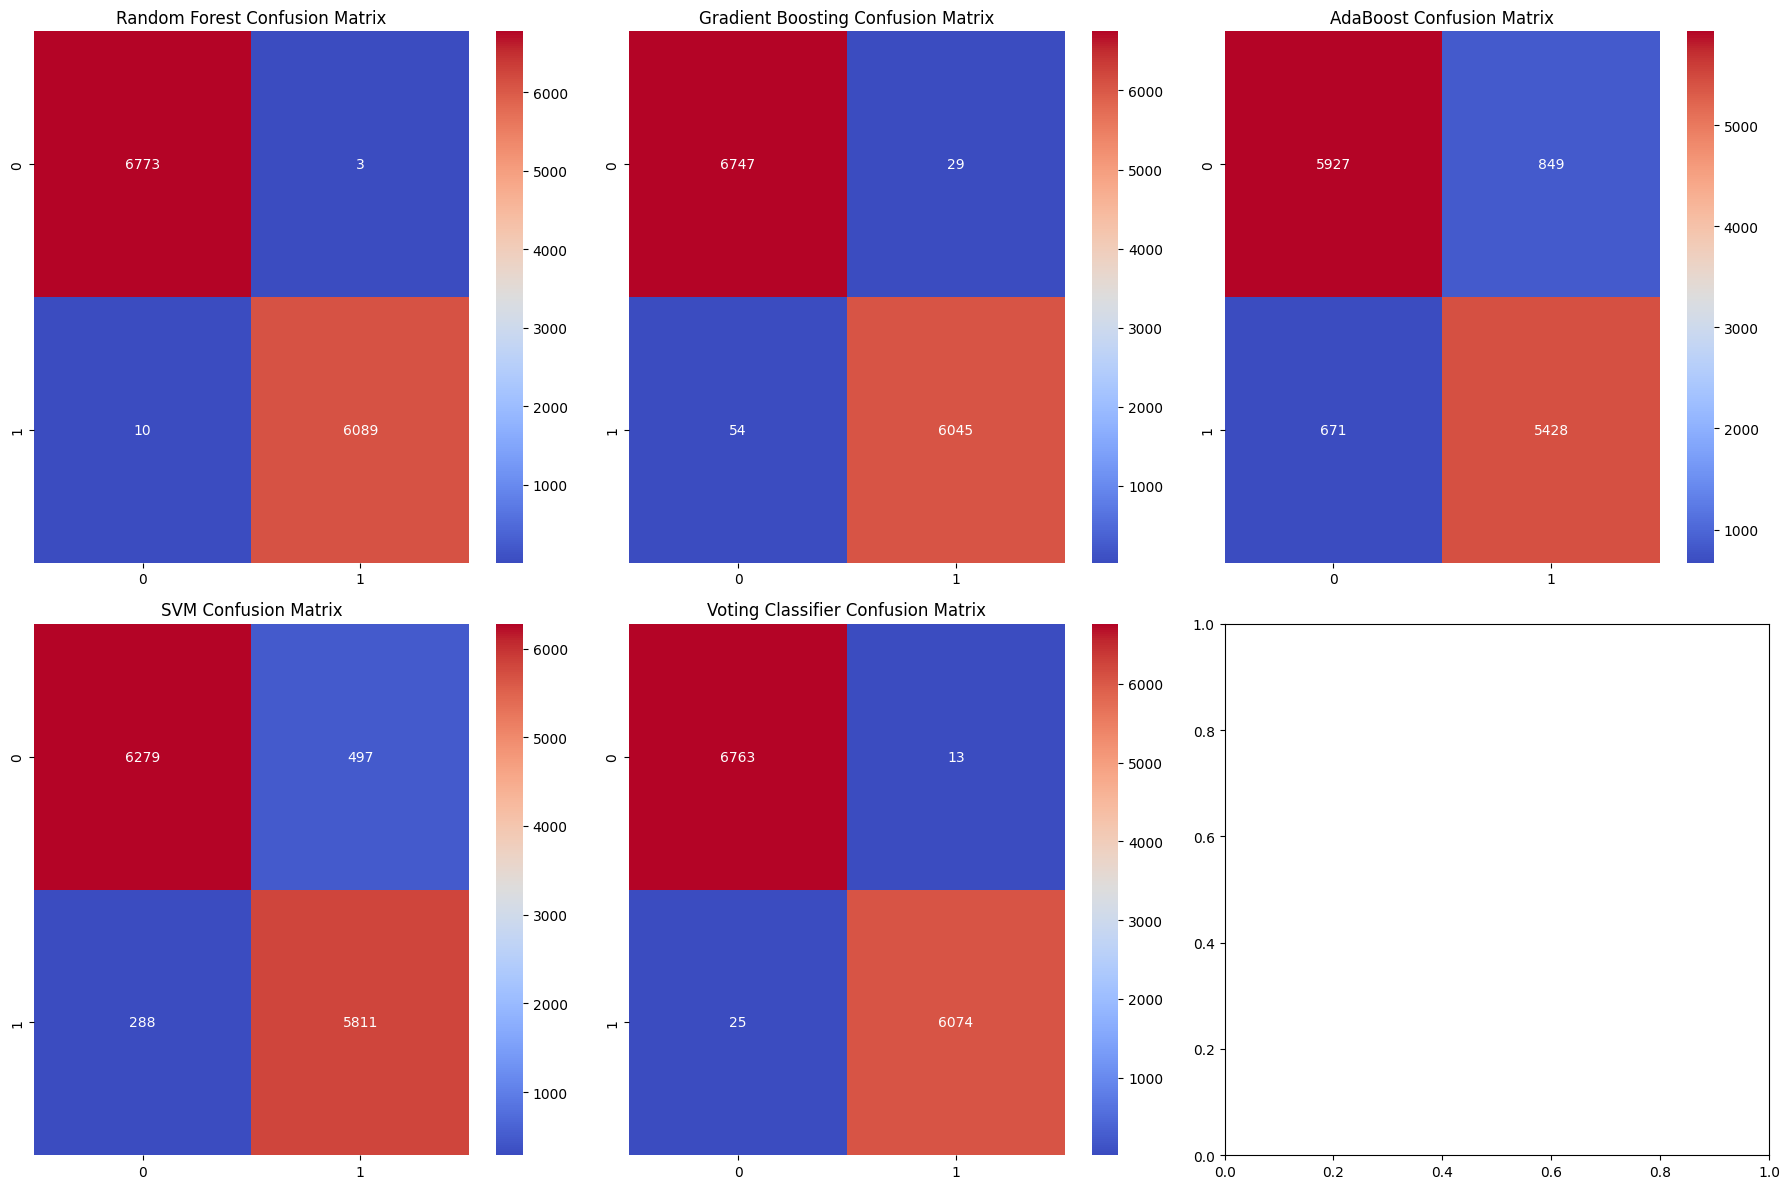

In [16]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
models = [rf, gb, ab, svm, voting_clf]
model_names = ["Random Forest", "Gradient Boosting", "AdaBoost", "SVM", "Voting Classifier"]
y_preds = [y_pred_rf, y_pred_gb, y_pred_ab, y_pred_svm, y_pred_voting]

for i, (model, name, y_pred) in enumerate(zip(models, model_names, y_preds)):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.show()
